In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv('D:/210968186/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [150]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [151]:
# Converting all categoric to numeric
df = df.replace(to_replace=['Plot  Area','Carpet  Area','Built-up  Area','Super built-up  Area'],value=[4,1,2,3])
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,4,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,2,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,3,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,2,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,3,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [152]:
df['size_numeric'] = df['size'].str[0]
df = df.drop('size',axis=1)
df = df.drop(columns=['location','society'])
df

,area_type,availability,total_sqft,bath,balcony,price,size_numeric
0,3,19-Dec,1056,2.0,1.0,39.07,2
1,4,Ready To Move,2600,5.0,3.0,120.00,4
2,2,Ready To Move,1440,2.0,3.0,62.00,3
3,3,Ready To Move,1521,3.0,1.0,95.00,3
4,3,Ready To Move,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,2,Ready To Move,3453,4.0,0.0,231.00,5
13316,3,Ready To Move,3600,5.0,NaN,400.00,4
13317,2,Ready To Move,1141,2.0,1.0,60.00,2
13318,3,18-Jun,4689,4.0,1.0,488.00,4


In [153]:
df = df.replace(to_replace=['Ready To Move','Immediate Possession'],value=[1,1])
df['availability'] = pd.to_numeric(df['availability'], errors='coerce')
df['availability'] = df['availability'].fillna(0)
df

,area_type,availability,total_sqft,bath,balcony,price,size_numeric
0,3,0.0,1056,2.0,1.0,39.07,2
1,4,1.0,2600,5.0,3.0,120.00,4
2,2,1.0,1440,2.0,3.0,62.00,3
3,3,1.0,1521,3.0,1.0,95.00,3
4,3,1.0,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,2,1.0,3453,4.0,0.0,231.00,5
13316,3,1.0,3600,5.0,NaN,400.00,4
13317,2,1.0,1141,2.0,1.0,60.00,2
13318,3,0.0,4689,4.0,1.0,488.00,4


In [154]:
int(df['size_numeric'].mode())

2

In [155]:
df['bath'] = df['bath'].fillna(df['bath'].mean(skipna=True))
df['balcony'] = df['balcony'].fillna(df['balcony'].mean(skipna=True))
df['size_numeric'] = df['size_numeric'].fillna(int(df['size_numeric'].mode()))
df

,area_type,availability,total_sqft,bath,balcony,price,size_numeric
0,3,0.0,1056,2.0,1.000000,39.07,2
1,4,1.0,2600,5.0,3.000000,120.00,4
2,2,1.0,1440,2.0,3.000000,62.00,3
3,3,1.0,1521,3.0,1.000000,95.00,3
4,3,1.0,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...
13315,2,1.0,3453,4.0,0.000000,231.00,5
13316,3,1.0,3600,5.0,1.584376,400.00,4
13317,2,1.0,1141,2.0,1.000000,60.00,2
13318,3,0.0,4689,4.0,1.000000,488.00,4


In [156]:
df.isna().sum()

area_type       0
availability    0
total_sqft      0
bath            0
balcony         0
price           0
size_numeric    0
dtype: int64

In [157]:
df.corr()['price']

area_type       0.183900
availability    0.034285
bath            0.455397
balcony         0.103989
price           1.000000
Name: price, dtype: float64

In [158]:
df['size_numeric'] = pd.to_numeric(df['size_numeric'])

In [165]:
df['total_sqft']  = pd.to_numeric(df['total_sqft'],errors='coerce')
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean(skipna=True))
df

,area_type,availability,total_sqft,bath,balcony,price,size_numeric
0,3,0.0,1056.0,2.0,1.000000,39.07,2
1,4,1.0,2600.0,5.0,3.000000,120.00,4
2,2,1.0,1440.0,2.0,3.000000,62.00,3
3,3,1.0,1521.0,3.0,1.000000,95.00,3
4,3,1.0,1200.0,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...
13315,2,1.0,3453.0,4.0,0.000000,231.00,5
13316,3,1.0,3600.0,5.0,1.584376,400.00,4
13317,2,1.0,1141.0,2.0,1.000000,60.00,2
13318,3,0.0,4689.0,4.0,1.000000,488.00,4


In [190]:
df = df/df.max()
df

,area_type,availability,total_sqft,bath,balcony,price,size_numeric
0,0.75,0.0,0.020202,0.050,0.333333,0.010853,0.222222
1,1.00,1.0,0.049740,0.125,1.000000,0.033333,0.444444
2,0.50,1.0,0.027548,0.050,1.000000,0.017222,0.333333
3,0.75,1.0,0.029098,0.075,0.333333,0.026389,0.333333
4,0.75,1.0,0.022957,0.050,0.333333,0.014167,0.222222
...,...,...,...,...,...,...,...
13315,0.50,1.0,0.066058,0.100,0.000000,0.064167,0.555556
13316,0.75,1.0,0.068871,0.125,0.528125,0.111111,0.444444
13317,0.50,1.0,0.021828,0.050,0.333333,0.016667,0.222222
13318,0.75,0.0,0.089704,0.100,0.333333,0.135556,0.444444


In [191]:
for value in df:
    print("Mean before "+value+":",df[value].mean(),"Std:",df[value].std())
    df[value].loc[np.logical_or(df[value] < df[value].mean() - 2*df[value].std(),df[value] > df[value].mean() + 2*df[value].std())] = df[value].median()
    print("Mean after "+value+":",df[value].mean(),"Std:",df[value].std())
df

Mean before area_type: 0.7393581081081081 Std: 0.14956176738476457
Mean after area_type: 0.7426238738738739 Std: 0.1442032032471005
Mean before availability: 0.7955705705705706 Std: 0.40329920504786193
Mean after availability: 0.7955705705705706 Std: 0.40329920504786193
Mean before total_sqft: 0.0297471309567934 Std: 0.02347186761074047
Mean after total_sqft: 0.02762062954146646 Std: 0.011682563698051318
Mean before bath: 0.06731524118667993 Std: 0.03344442084178336
Mean after bath: 0.06233588683232596 Std: 0.022182307821522612
Mean before balcony: 0.5281252458500468 Std: 0.26612016073149714
Mean after balcony: 0.5281252458500468 Std: 0.26612016073149714
Mean before price: 0.031268229583750695 Std: 0.041381020491575944
Mean after price: 0.026060334188355256 Std: 0.019425095914073078
Mean before size_numeric: 0.30878378378378596 Std: 0.12993715723218324
Mean after size_numeric: 0.29350183516850475 Std: 0.0933201980831208


,area_type,availability,total_sqft,bath,balcony,price,size_numeric
0,0.75,0.0,0.020202,0.050,0.333333,0.010853,0.222222
1,1.00,1.0,0.049740,0.125,1.000000,0.033333,0.444444
2,0.50,1.0,0.027548,0.050,1.000000,0.017222,0.333333
3,0.75,1.0,0.029098,0.075,0.333333,0.026389,0.333333
4,0.75,1.0,0.022957,0.050,0.333333,0.014167,0.222222
...,...,...,...,...,...,...,...
13315,0.50,1.0,0.066058,0.100,0.000000,0.064167,0.555556
13316,0.75,1.0,0.068871,0.125,0.528125,0.111111,0.444444
13317,0.50,1.0,0.021828,0.050,0.333333,0.016667,0.222222
13318,0.75,0.0,0.024631,0.100,0.333333,0.020000,0.444444


In [192]:
Y = df['price']
X = df.drop('price',axis=1)
Y

0        0.010853
1        0.033333
2        0.017222
3        0.026389
4        0.014167
           ...   
13315    0.064167
13316    0.111111
13317    0.016667
13318    0.020000
13319    0.004722
Name: price, Length: 13320, dtype: float64

In [193]:
X

,area_type,availability,total_sqft,bath,balcony,size_numeric
0,0.75,0.0,0.020202,0.050,0.333333,0.222222
1,1.00,1.0,0.049740,0.125,1.000000,0.444444
2,0.50,1.0,0.027548,0.050,1.000000,0.333333
3,0.75,1.0,0.029098,0.075,0.333333,0.333333
4,0.75,1.0,0.022957,0.050,0.333333,0.222222
...,...,...,...,...,...,...
13315,0.50,1.0,0.066058,0.100,0.000000,0.555556
13316,0.75,1.0,0.068871,0.125,0.528125,0.444444
13317,0.50,1.0,0.021828,0.050,0.333333,0.222222
13318,0.75,0.0,0.024631,0.100,0.333333,0.444444


In [194]:
df.corr()

,area_type,availability,total_sqft,bath,balcony,price,size_numeric
area_type,1.000000,-0.008501,-0.011587,0.192390,-0.015422,0.186595,0.213425
availability,-0.008501,1.000000,0.030391,0.040542,0.112083,0.077165,0.074444
total_sqft,-0.011587,0.030391,1.000000,0.550418,0.213268,0.596201,0.551760
bath,0.192390,0.040542,0.550418,1.000000,0.231804,0.531640,0.777996
balcony,-0.015422,0.112083,0.213268,0.231804,1.000000,0.149024,0.230365
price,0.186595,0.077165,0.596201,0.531640,0.149024,1.000000,0.530630
size_numeric,0.213425,0.074444,0.551760,0.777996,0.230365,0.530630,1.000000


In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [196]:
theta = [0.5,0.5,0.5,0.5,0.5,0.5]
def hypothesis(theta, X):
    return theta*X
def Cost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(X))
def gradientDescent(X, y, theta, alpha, epoch):
    costs = []  
    k = 0
    while k < epoch:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        cost = Cost(X, y, theta)
        costs.append(cost)
        k += 1
    return costs, cost, theta
cost , c , theta = gradientDescent(X_train,Y_train,theta,0.0023,9700)
c

0.01038479887002097

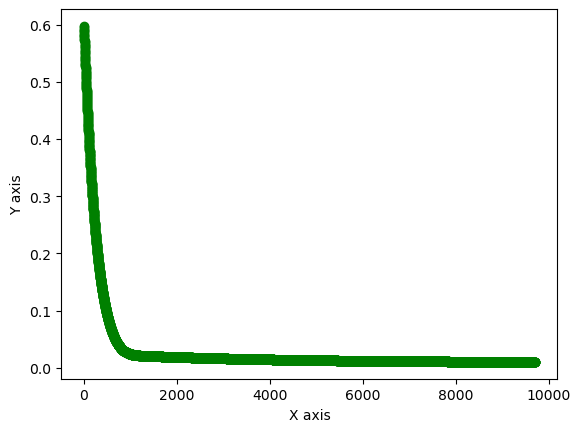

In [197]:
plt.scatter(x=list(range(len(cost))), y = cost, color='green')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [207]:
y_new = hypothesis(theta, X_test)
y_new = np.sum(y_new, axis=1)

from sklearn.metrics import mean_squared_error,r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_new,Y_test)))
print('R2 score:',r2_score(y_new,Y_test))

RMSE: 0.027443266977550212
R2 score: 0.24802345470909437


In [206]:
y_pred_train = hypothesis(theta, X_train)
y_pred_train = np.sum(y_pred_train, axis=1)

print('RMSE:', np.sqrt(mean_squared_error(y_pred_train,Y_train)))
print('R2 score:',r2_score(y_pred_train,Y_train))

RMSE: 0.02733028935358149
R2 score: 0.2514672606979873


[]

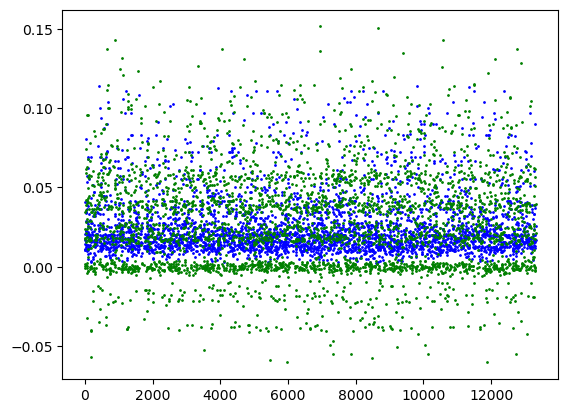

In [214]:
plt.scatter(Y_test.index,Y_test,c='blue',s=1)
plt.scatter(Y_test.index,y_new,c='green',s=1)
plt.plot()